<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

_Authors: Joseph Nelson (DC), Haley Boyan (DC), Sam Stack (DC)_

---

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1. Import the data

In [2]:
seeds = pd.read_csv("./datasets/seeds.csv")

In [3]:
# A:
seeds.head()

area  perimeter  compactness  length  width  asymmetry_coeff  \
0  15.26      14.84       0.8710   5.763  3.312            2.221   
1  14.88      14.57       0.8811   5.554  3.333            1.018   
2  14.29      14.09       0.9050   5.291  3.337            2.699   
3  13.84      13.94       0.8955   5.324  3.379            2.259   
4  16.14      14.99       0.9034   5.658  3.562            1.355   

   groove_length  species  
0          5.220        1  
1          4.956        1  
2          4.825        1  
3          4.805        1  
4          5.175        1

In [4]:
seeds.dtypes

area               float64
perimeter          float64
compactness        float64
length             float64
width              float64
asymmetry_coeff    float64
groove_length      float64
species              int64
dtype: object

### 2. Do some EDA of relationships between features.

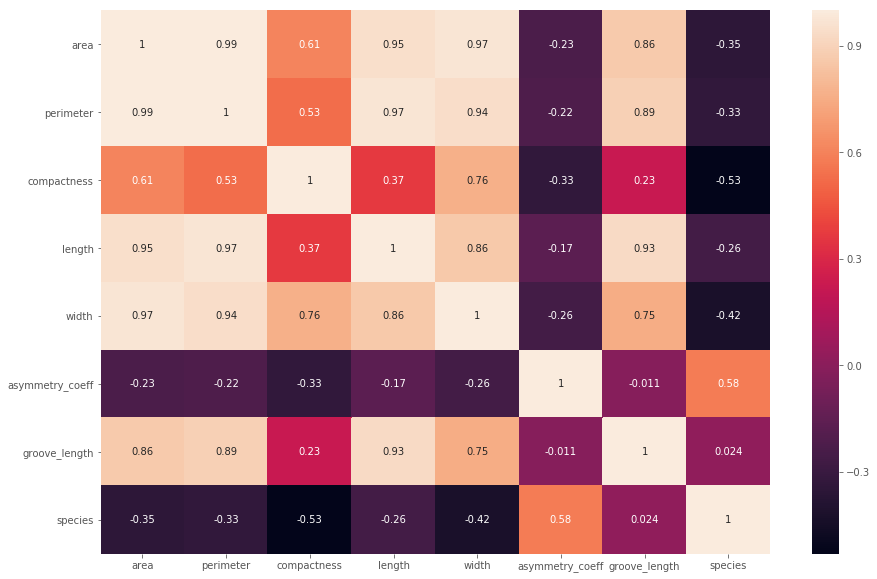

In [5]:
# Plot the Data to see the distributions/relationships
plt.figure(figsize=(15,10))
sns.heatmap(seeds.corr(), annot=True)

In [6]:
# Check for nulls
seeds.isnull().sum()
# there are no nulls throughout all the columns

area               0
perimeter          0
compactness        0
length             0
width              0
asymmetry_coeff    0
groove_length      0
species            0
dtype: int64

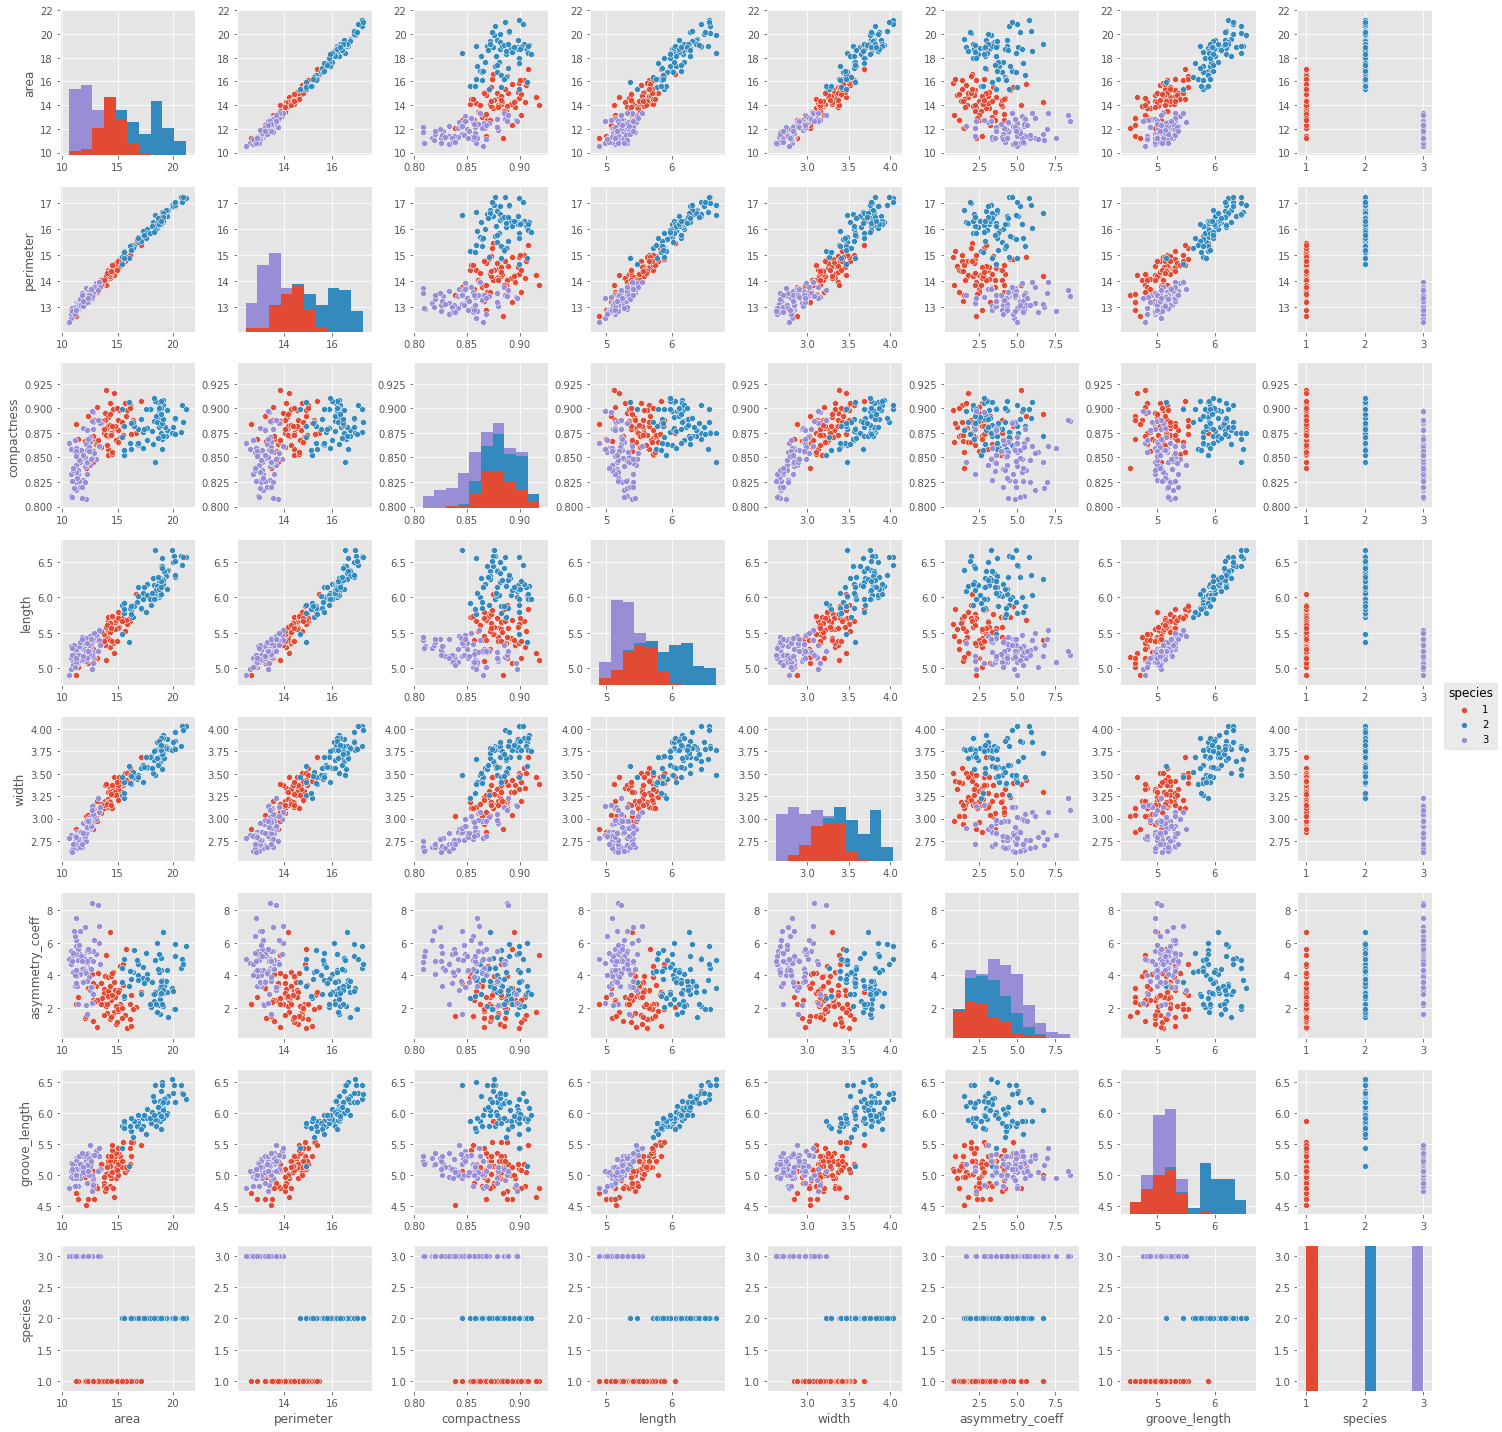

In [7]:
# Look at the real species labels.
sns.pairplot(seeds, hue='species')

In [8]:
seeds['species'].value_counts()

3    70
2    70
1    70
Name: species, dtype: int64

Remember, clustering is a unsupervised learning method so known classes will never be a thing.  In this situation we can see that the `perimiter` vs. `groove_length` is a good visualization to view the proper classes class, and we can use later to compare the results of clustering to a true value.

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [9]:
# A:
X = seeds[[x for x in seeds.columns if x != 'species']].copy()
y = seeds['species'].copy()

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. However, in an actual situation in which we used clustering we would have no idea. Lets initally try using the default K for `KMeans`(8).

In [10]:
from sklearn.cluster import KMeans

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
ss = StandardScaler()

In [13]:
Xs = ss.fit_transform(X)

km = KMeans(n_clusters=8, n_jobs=-1)

In [14]:
km.fit(Xs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
labels = km.labels_
centroids = km.cluster_centers_

print('predicted clusters to points:', '\n', labels)
print('location of centroids:', '\n', centroids)

predicted clusters to points: 
 [4 4 7 7 4 7 4 7 5 4 5 4 7 7 7 7 7 7 7 1 4 4 4 1 4 4 1 1 4 1 1 4 4 4 4 4 5
 2 4 6 7 7 7 5 7 7 4 4 4 4 4 5 4 4 4 4 7 7 4 1 1 1 7 1 1 7 4 4 4 1 5 5 5 2
 5 5 5 0 0 5 5 2 0 0 0 2 2 0 0 0 0 2 2 2 0 5 0 0 0 2 5 2 2 0 0 2 2 5 0 2 2
 0 2 0 0 2 2 2 2 0 0 5 5 2 7 2 0 2 0 5 2 2 5 5 5 7 5 5 5 5 6 6 6 6 3 3 1 1
 1 3 3 3 3 3 3 3 1 3 3 3 1 3 3 1 6 1 3 1 3 3 3 6 3 3 3 3 3 3 3 1 3 6 6 6 6
 3 3 3 6 6 3 1 1 3 1 6 6 6 1 7 6 7 1 6 1 1 3 6 1 6]
location of centroids: 
 [[ 1.64815895  1.69683522  0.24333727  1.82032534  1.35288623  0.12015805
   1.77699482]
 [-0.89044986 -0.90330883 -0.47081532 -0.86326133 -0.87480614 -0.4073574
  -0.81124588]
 [ 1.31560027  1.23077846  1.13881675  1.08619622  1.38878907 -0.43515515
   1.13840185]
 [-1.1791648  -1.09465061 -1.64667946 -0.88368637 -1.38881103  0.82575592
  -0.52889397]
 [ 0.01129915  0.03298346  0.23693541  0.04973401  0.06867873 -0.92294415
  -0.38160368]
 [ 0.5863694   0.6600514   0.13662441  0.65071439  0.5217097   0.2365113

### 5. Get the labels and centroids for out first clustering model.

In [16]:
# A:
# See above 

#### 6. Compute the silouette score and visually examine the results of the 8 clusters. 

_(pairplot with hue)_

In [17]:
from sklearn.metrics import silhouette_score

# A:

In [23]:
inertia = km.inertia_
sil_score = silhouette_score(Xs, labels, metric='euclidean')

In [24]:

print('silhoutte score:      ', sil_score)

silhoutte score:       0.251909117584


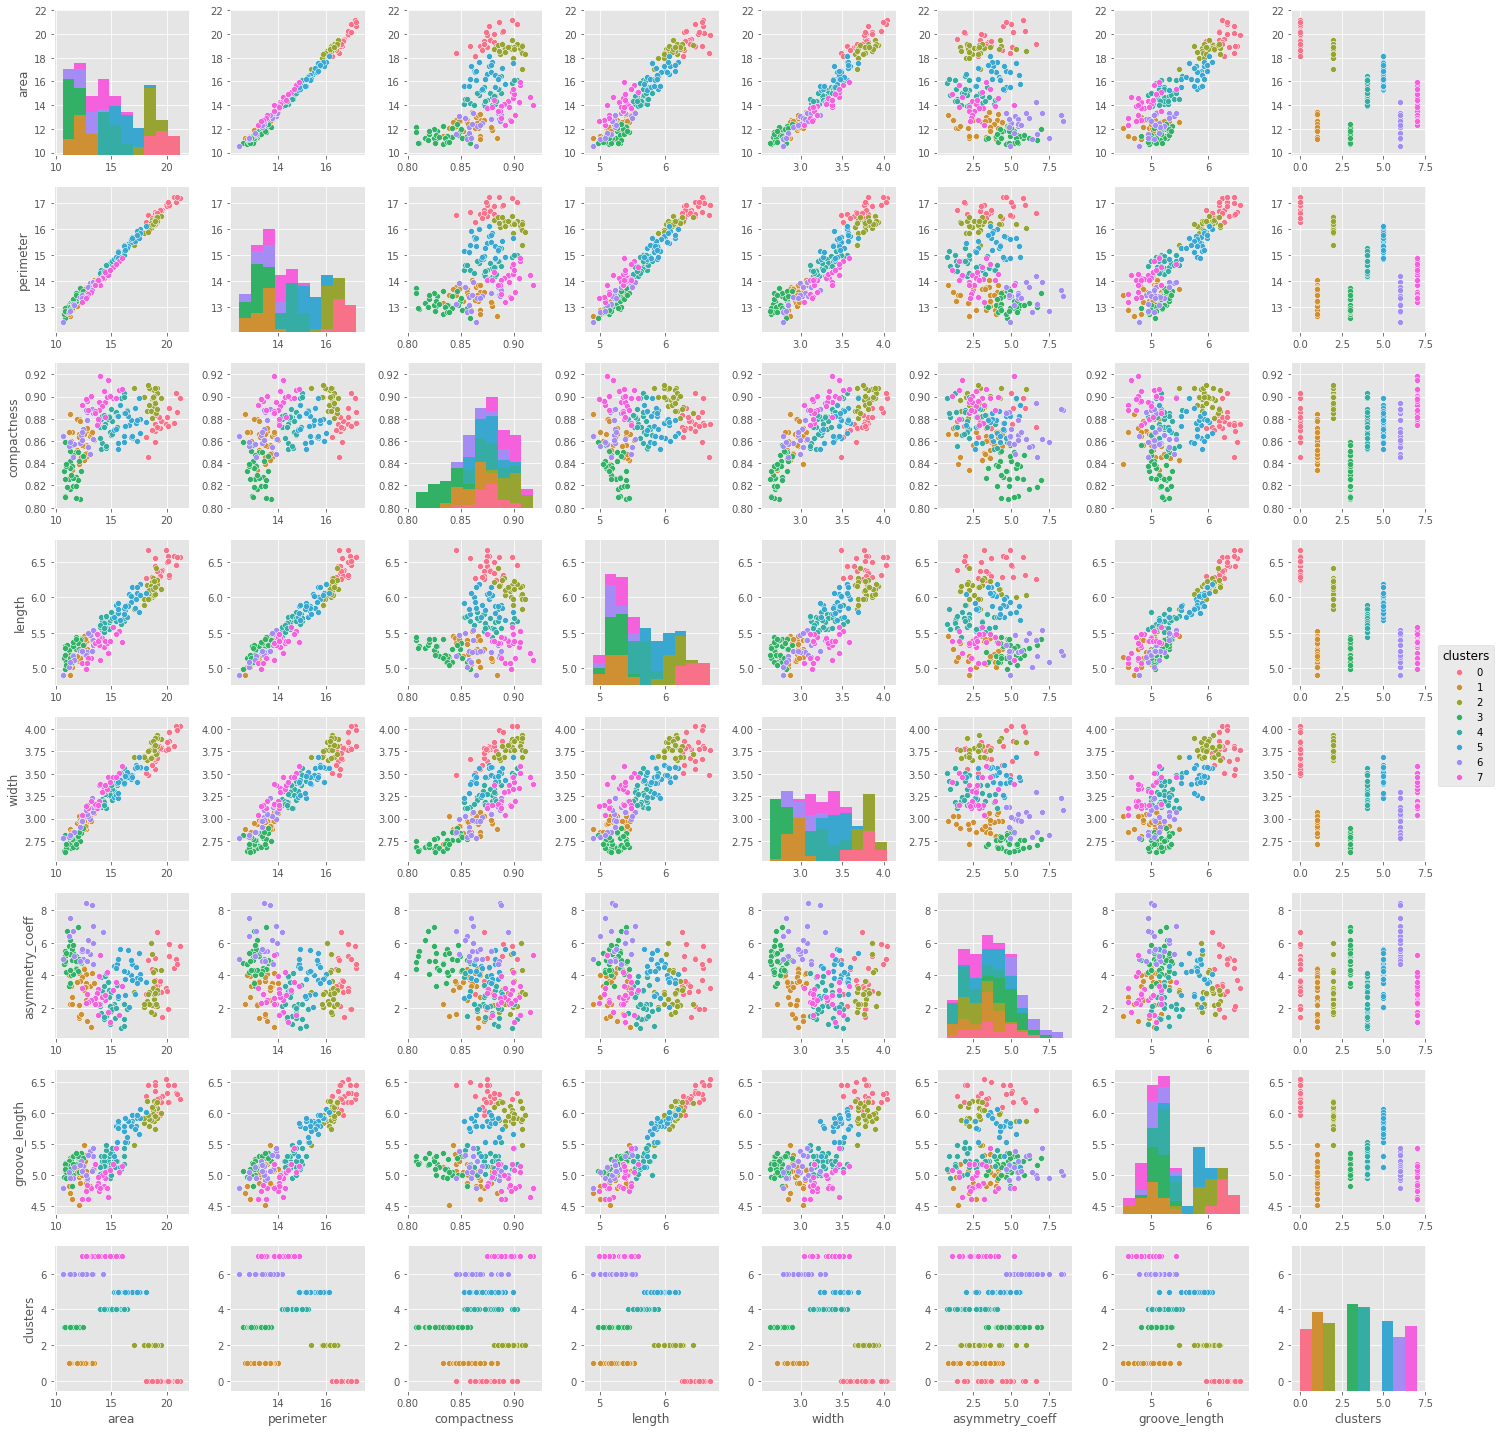

In [27]:
X['clusters'] = labels
sns.pairplot(X , hue='clusters')

### 7. Repeat steps #4 and #6 with two selected or random K values and compare the results to the k=8 model.

In [29]:
import random

random.randint(1,25), random.randint(1,25)

(16, 18)

In [30]:
# A:
from sklearn.cluster import KMeans

In [31]:
km4 = KMeans(n_clusters=4, n_jobs=-1)
km4.fit(Xs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
labels4 = km4.labels_
sil_score4 = silhouette_score(Xs, labels4)
print(sil_score4)

0.334754229628


In [34]:
centroids4 = km4.cluster_centers_
print(centroids4)

[[ 1.44991178  1.4387275   0.65309838  1.42925506  1.3331669  -0.14720852
   1.44992055]
 [-1.04206483 -1.00638228 -1.07266687 -0.87633355 -1.1265381   0.8359436
  -0.56735825]
 [-0.31020334 -0.36020056  0.43595531 -0.46823684 -0.13735849 -0.79356161
  -0.79091874]
 [ 0.43032887  0.48154667  0.2335189   0.45429113  0.43450761  0.18629161
   0.4591566 ]]


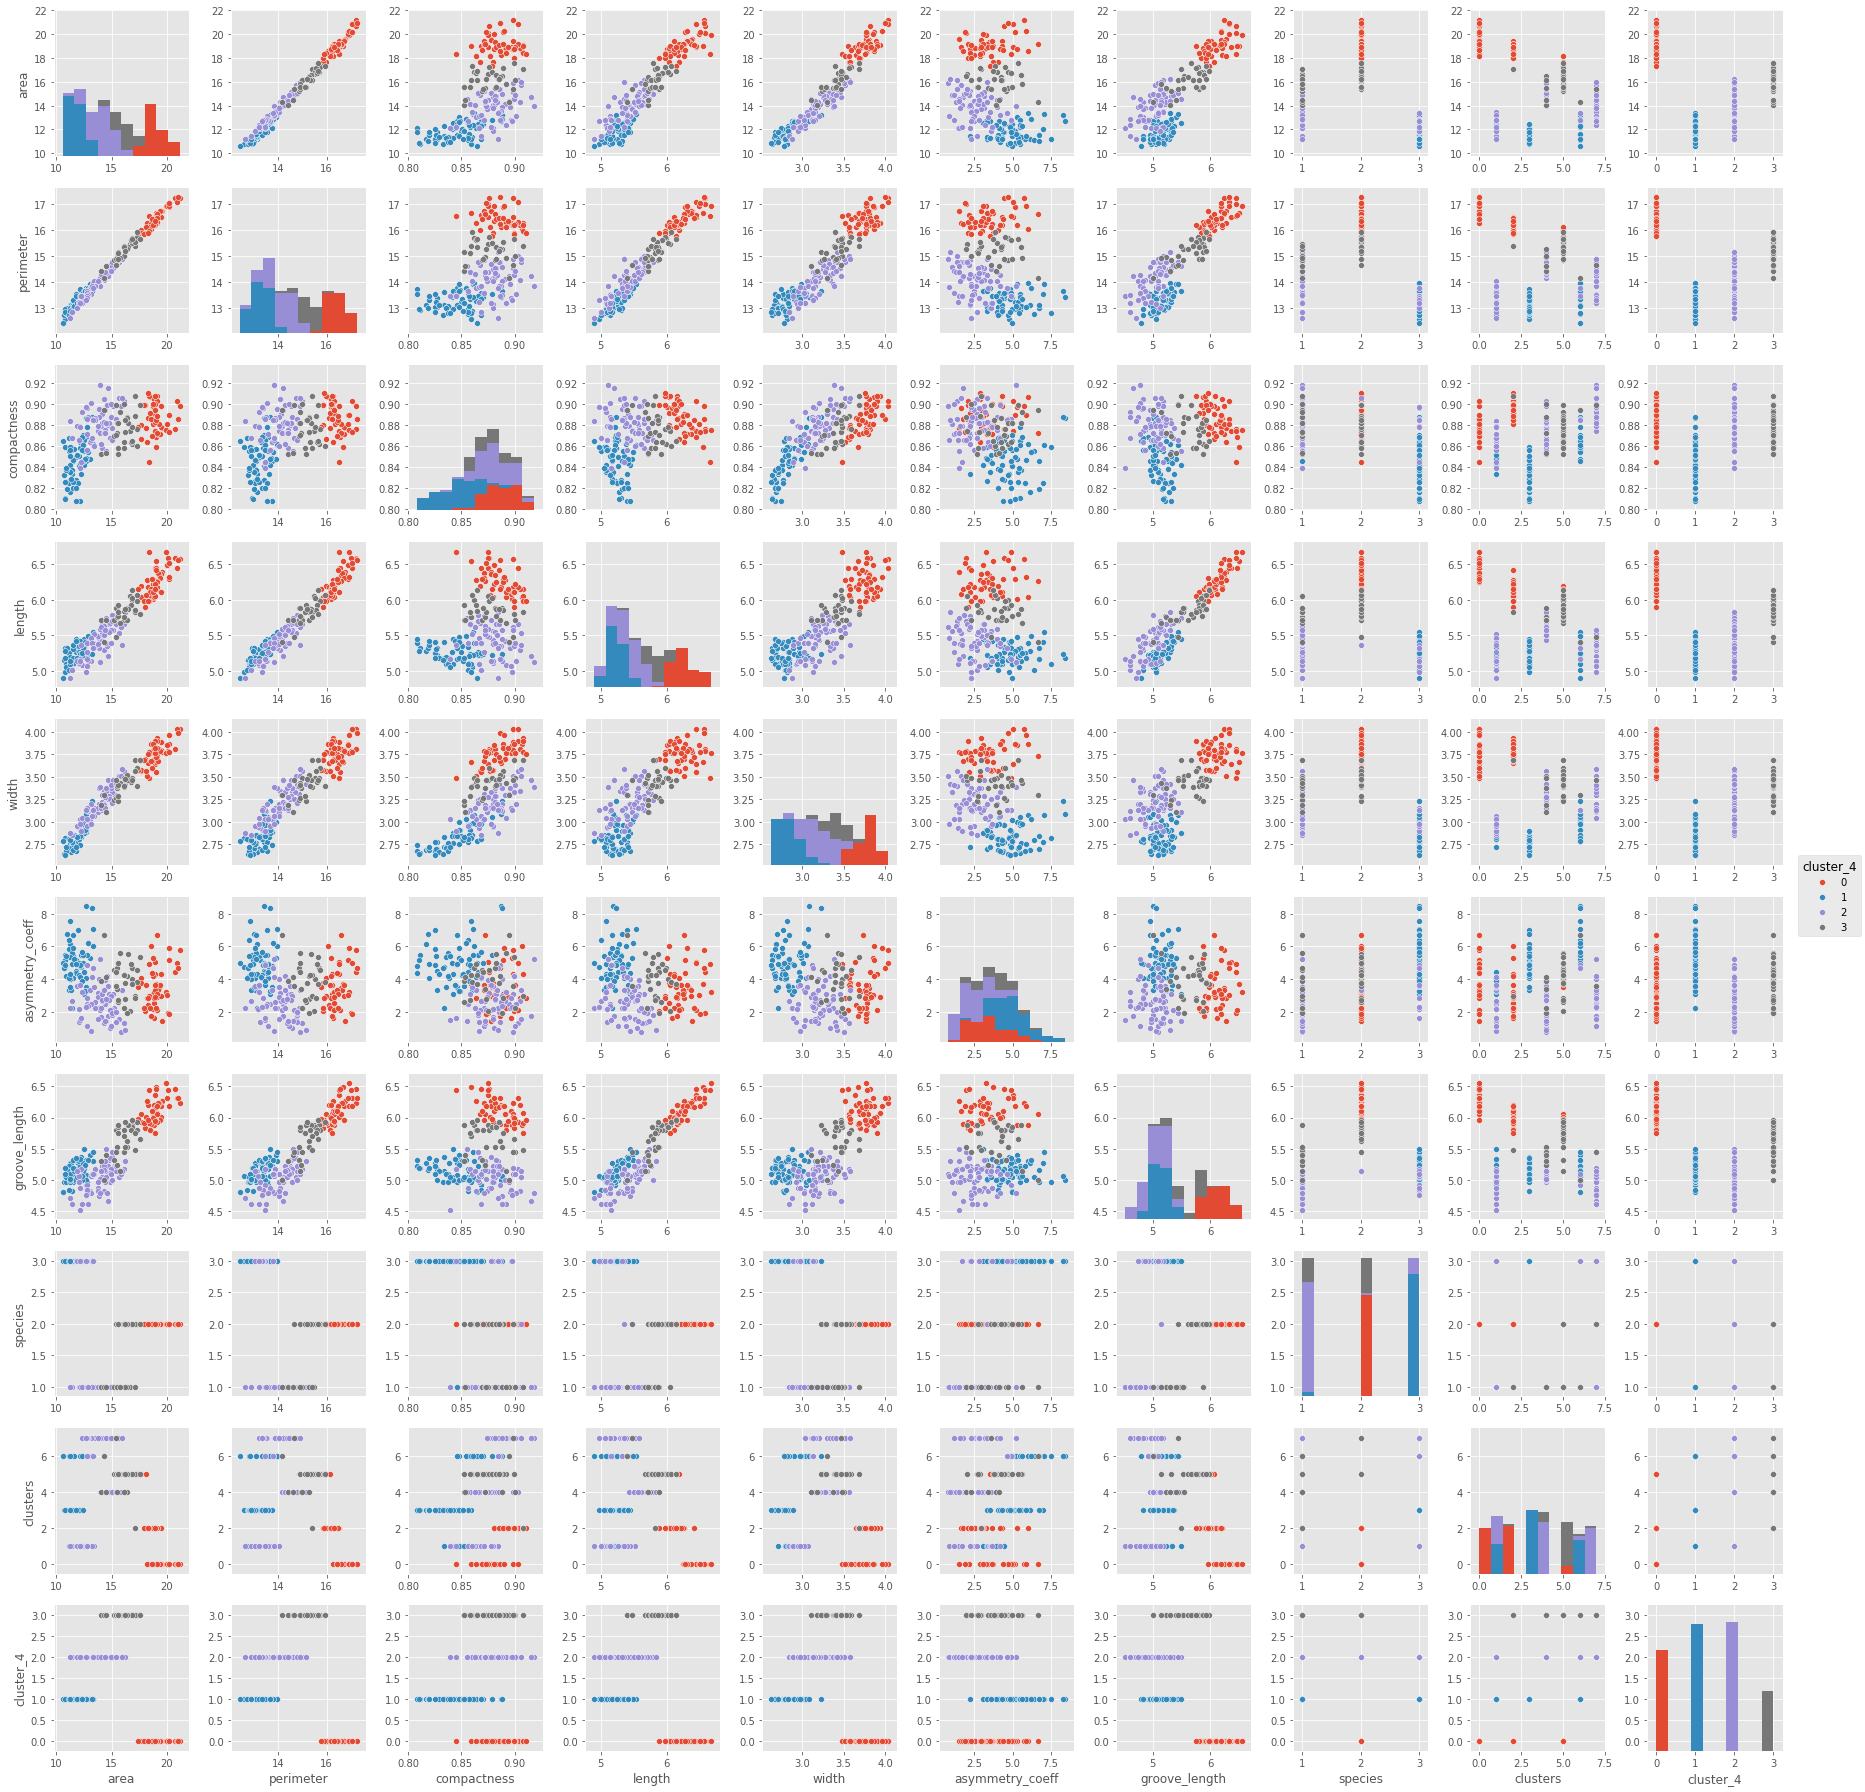

In [35]:
seeds['cluster_4'] = labels4
sns.pairplot(seeds, hue='cluster_4')

## Trying with 3 clusters now

In [37]:
from sklearn.cluster import KMeans
km3 = KMeans(n_clusters=3, n_jobs=-1)

In [38]:
km3.fit(Xs)
km3.predict(Xs)

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0])

In [39]:
labels3 = km3.labels_
centroids3 = km3.cluster_centers_

seeds['clusters3'] = labels3
seeds.head()

area  perimeter  compactness  length  width  asymmetry_coeff  \
0  15.26      14.84       0.8710   5.763  3.312            2.221   
1  14.88      14.57       0.8811   5.554  3.333            1.018   
2  14.29      14.09       0.9050   5.291  3.337            2.699   
3  13.84      13.94       0.8955   5.324  3.379            2.259   
4  16.14      14.99       0.9034   5.658  3.562            1.355   

   groove_length  species  clusters  cluster_4  clusters3  
0          5.220        1         4          2          2  
1          4.956        1         4          2          2  
2          4.825        1         7          2          2  
3          4.805        1         7          2          2  
4          5.175        1         4          2          2

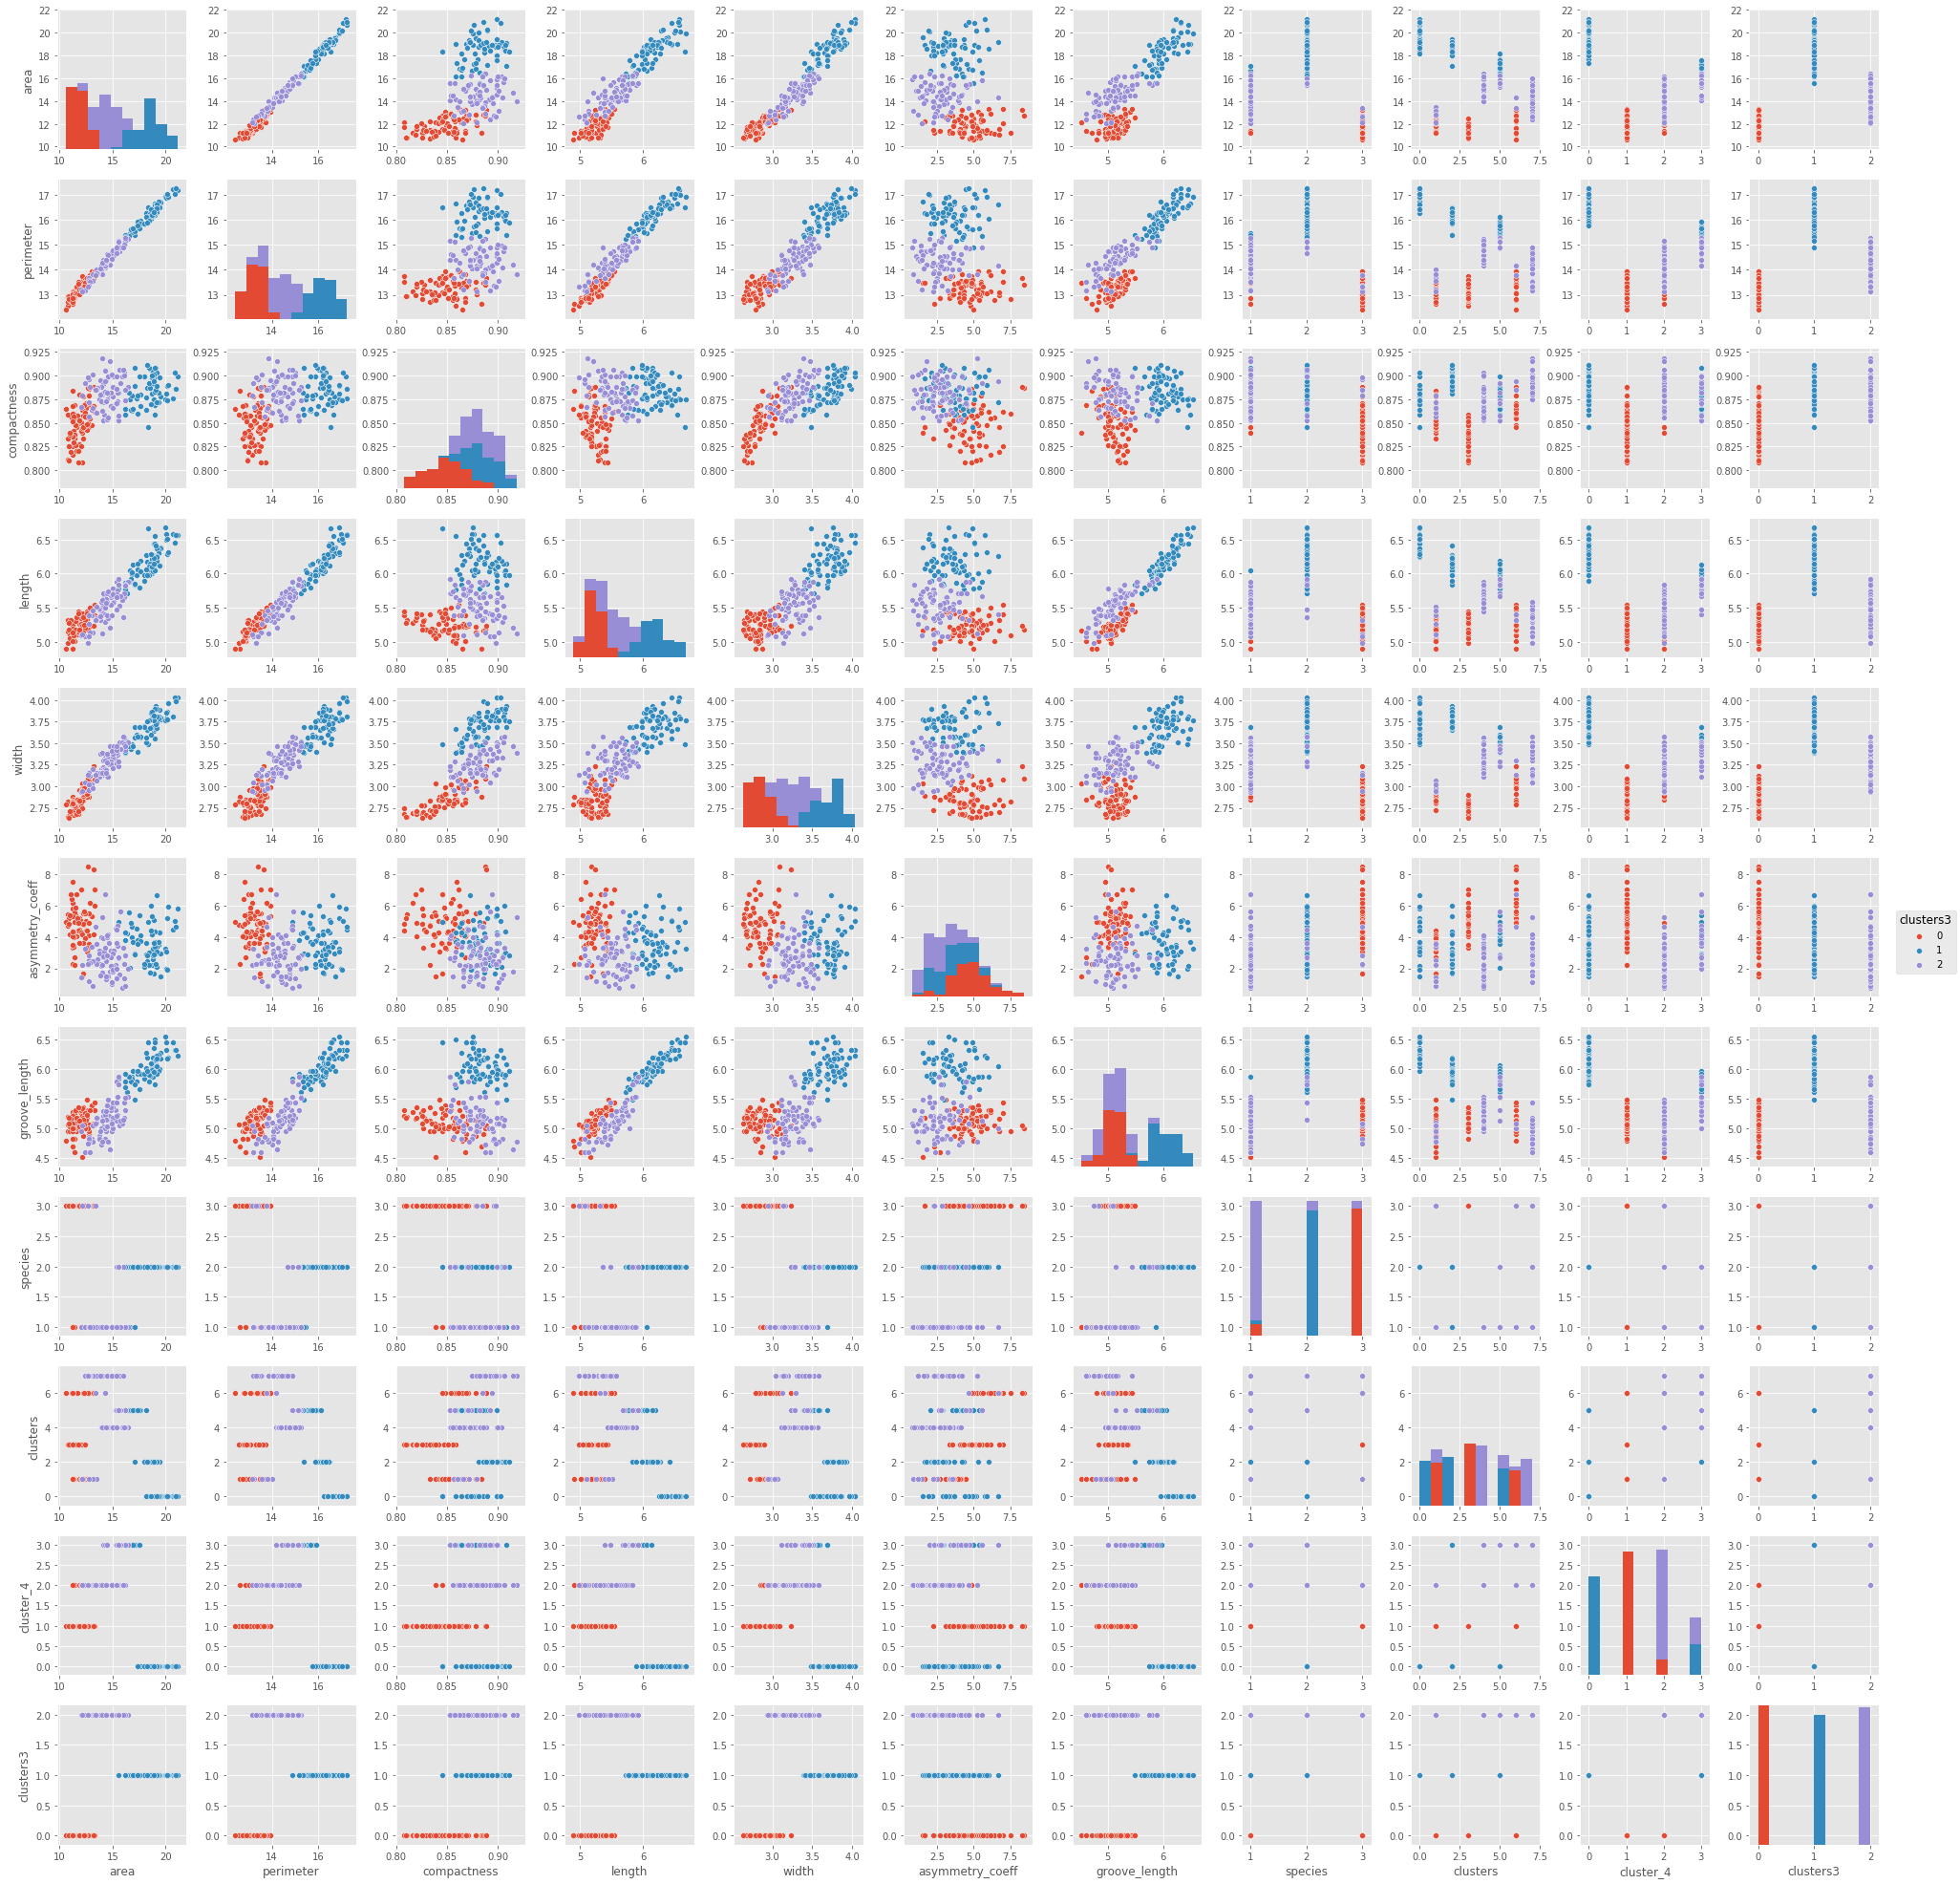

In [40]:
sns.pairplot(seeds, hue='clusters3')

### 8. Build a function to find the optimal number of clusters using silhouette score as the criteria.
1. Function should accept a range and a dataframe as arguments
2. Returns the optimal K value, associate silhoutte and scaling method.
3. Your function should also consider the scaled results of the data. 
    - `normalize`, `StandardScaler`, `MinMaxScaler`


Once you have found the optimal K and version of the data, visualize the clusters.





In [42]:
# A:
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler

In [55]:
results = pd.DataFrame(columns=['k', 'silhouette', 'processing'])

In [56]:
def cluster(ran, data,version):
    for k in ran:
        k_means = KMeans(n_clusters=k)
        k_means.fit(data)
        labels = k_means.labels_
        score = silhouette_score(data, labels)
        results.loc[len(results)] = ['c'+ str(k), score, version]

In [57]:
def opt_cluster(ran, data):
    cluster(ran,data, 'default')
    
    Xn = normalize(data)
    cluster(ran, Xn, 'normalized')
    
    ss = StandardScaler()
    Xs = ss.fit_transform(data)
    cluster(ran, Xs, 'standard_scaler')
    
    MM = MinMaxScaler()
    Xmm = MM.fit_transform(data)
    cluster(ran, Xmm, 'min_max_scaler')
    
    return results.loc[results['silhouette'].idxmax()]

In [61]:
ran = list(range(2,12))
opt_cluster(ran, Xs)

k                    c10
silhouette      0.529854
processing    normalized
Name: 18, dtype: object

In [63]:
k_mean_opt = KMeans(n_clusters=10)
k_mean_opt.fit(X)
labels_opt = k_mean_opt.labels_

In [64]:
X_opt = seeds[[x for x in seeds.columns if x != 'species']].copy()
X_opt['opt_clusters'] = labels_opt

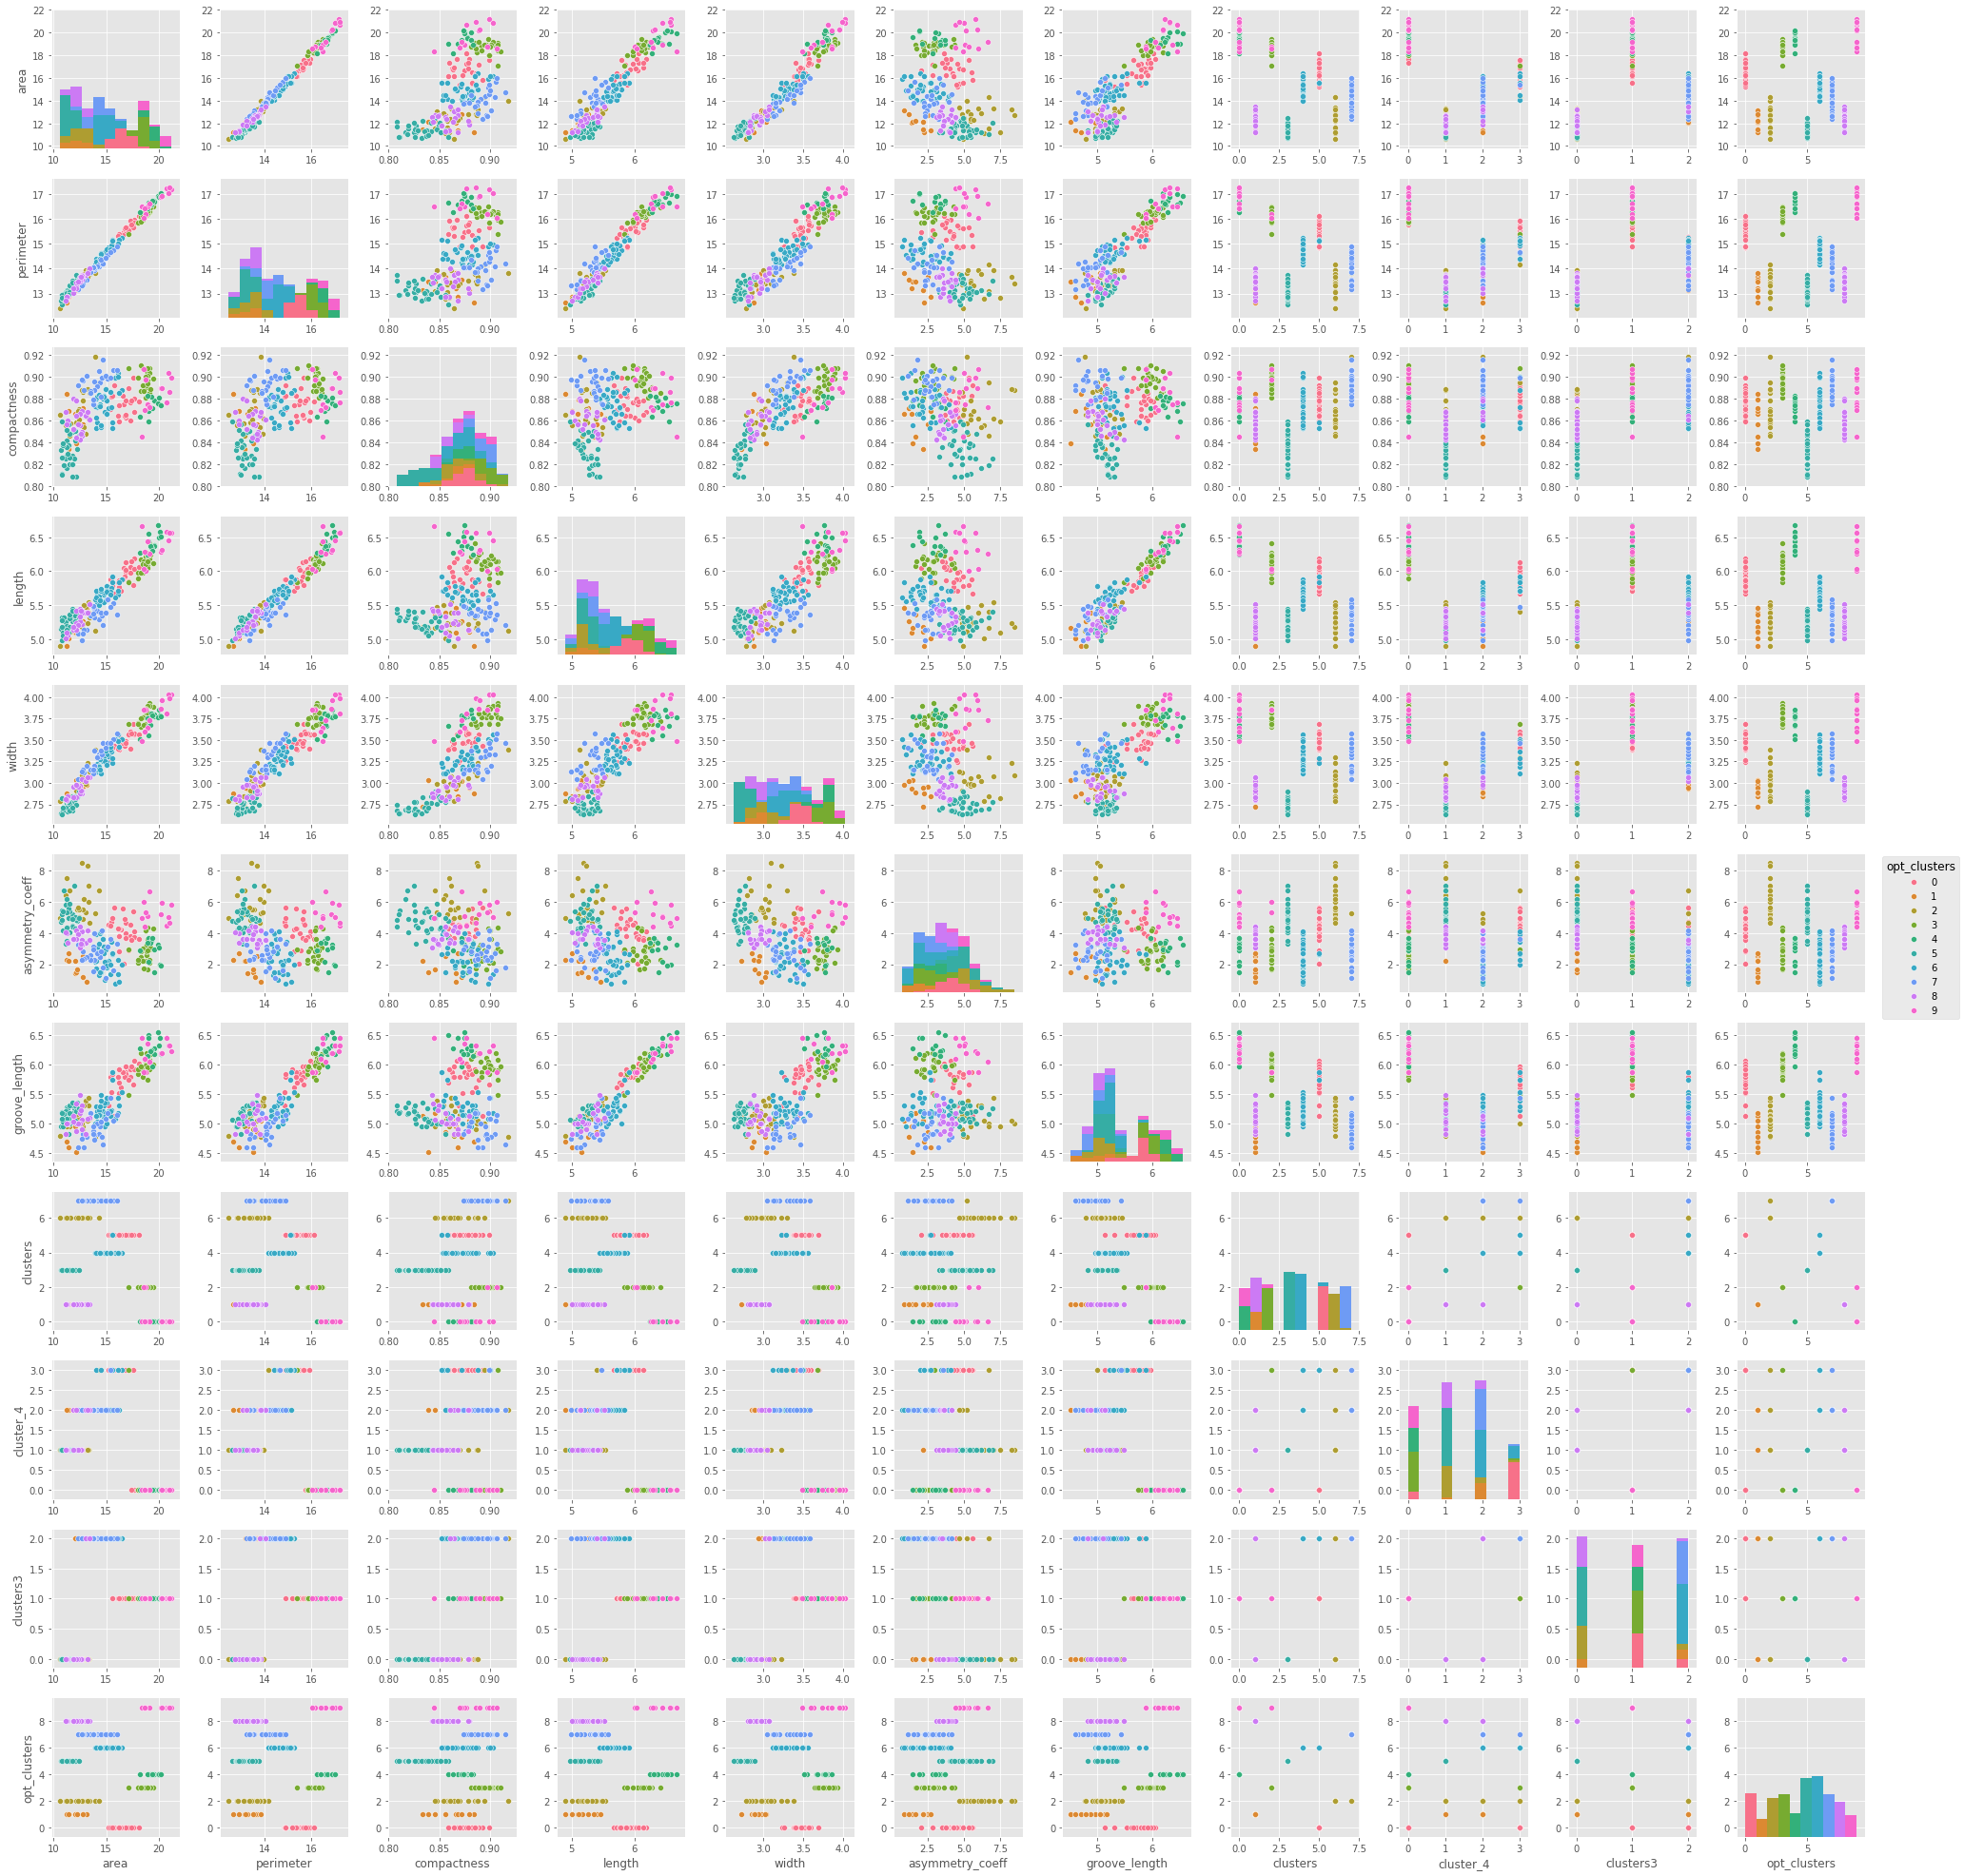

In [65]:
sns.pairplot(X_opt, hue='opt_clusters')